# __Education Project__

## __Introduction__

#### For this project, we are looking to use the data science methodology to answer the question of whether school performance is predicted by socioeconomic factors in the United States. In this case, we are going to compare ACT Scores in school disctricts to multiple socioeconomic factors. We are also going to add a factor that is based on _% of private school entrollment in an area_ as well. 

### Import Necessary Libraries for Analysi and Importing Datasets

#### Our first step is to import our necessary libraries into our notebook, which consist of 
#### - pandas (pd) for our data analysis functions, 
#### - numpy(np) for additional mathematical tools, 
#### - matplotlib.pyplot(plt)__ for our graphs, 
#### - seaborn (sns), which acts as an additional data visualization project built on matplotlib (we will also set our grid for sns to be white at this stage).
#### - wget for importing large datasets 
#### - StandardScaler from sklearn.preprocessing for model processiong.
#### - stats.models.formula.api and stats.models.api for Modelling
#### - r2_score, mean_squared_error, mean_absolute_error from sklearn.metrics from sklearn.metrics +
#### -anova_lm from statsmodels.stats.anova for model metrics and analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
#set the plotting style
sns.set_style("whitegrid")

import wget as wget

# Model preprocessing
from sklearn.preprocessing import StandardScaler

#Modelling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm

#### Now that we have successfully imported our libraries and graphics tools, we can now being importing our datasets from EdGap and the National Center for Education Statistics.

## Import EdGap & National Center for Education Statistics Dataframes & Other Datasets

#### We will import our data using the __pandas__ function __pd.read_excel()__, and we will import our data from our Github repository for [EdGap]() and for [Pittsburgh](https://raw.githubusercontent.com/CameronMangione/weather/refs/heads/main/data/pittsburgh_rain.csv').

#### Note that for these functions to work properly, we needed to import the raw files, which are linked above.

#### __Brian's method in the lecture did not work so I should meet with him in office hours tomorrow to go over this process.__

In [2]:
edgap = pd.read_excel('https://raw.githubusercontent.com/CameronMangione/education/main/data/EdGap_data.xlsx',
dtype = {'NCESSCH School ID': object})

/opt/anaconda3/lib/python3.13/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [3]:
!wget -O ccd_sch_029_1617_w_1a_11212017.csv "https://www.dropbox.com/s/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv?dl=0"

--2025-10-16 18:28:40--  https://www.dropbox.com/s/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv?dl=0
162.125.1.18w.dropbox.com (www.dropbox.com)... 
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
302 Foundest sent, awaiting response... 
Location: https://www.dropbox.com/scl/fi/o8wf1f534pb4u7uavgjxm/ccd_sch_029_1617_w_1a_11212017.csv?rlkey=k2aey38xie2vz9ge4a0v3rrib&dl=0 [following]
--2025-10-16 18:28:40--  https://www.dropbox.com/scl/fi/o8wf1f534pb4u7uavgjxm/ccd_sch_029_1617_w_1a_11212017.csv?rlkey=k2aey38xie2vz9ge4a0v3rrib&dl=0
Reusing existing connection to www.dropbox.com:443.
302 Foundest sent, awaiting response... 
Location: https://uc4780b04af95e1324aca927fc7a.dl.dropboxusercontent.com/cd/0/inline/CzXkc3wicN9CMMSfo6pd-9x-usZFQjQa9IuIndbrvpGWO7Z6SH1PuvZs7PeQavqhl9Ix5Z3m_1pE5IpRq0pnXV3kq2bEiU5tdiBSK5-zGd-9NG3pBXeszR4WI24ABQuXvW8/file# [following]
--2025-10-16 18:28:41--  https://uc4780b04af95e1324aca927fc7a.dl.dropboxusercontent.com/cd/0/inline

In [4]:
!ls

Education.ipynb                        ccd_sch_029_1617_w_1a_11212017 (1).csv
Education2.ipynb                       ccd_sch_029_1617_w_1a_11212017.csv
Education3.ipynb                       education_clean.csv
anaconda_projects


In [5]:
school_information = pd.read_csv("ccd_sch_029_1617_w_1a_11212017.csv", encoding="unicode_escape")

/var/folders/j8/rt19hmcs2rx__jyns29v73q40000gn/T/ipykernel_27919/2254672515.py:1: DtypeWarning: Columns (6,9,14,15,18,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  school_information = pd.read_csv("ccd_sch_029_1617_w_1a_11212017.csv", encoding="unicode_escape")


In [6]:
school_district = pd.read_csv("https://raw.githubusercontent.com/CameronMangione/education/main/data/School_District_Characteristics_-_Current.csv", encoding="unicode_escape")

In [7]:
public_school = pd.read_csv("https://raw.githubusercontent.com/CameronMangione/education/main/data/Public_School_Characteristics_2022-23.csv", encoding="unicode escape")

/var/folders/j8/rt19hmcs2rx__jyns29v73q40000gn/T/ipykernel_27919/3129943478.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  public_school = pd.read_csv("https://raw.githubusercontent.com/CameronMangione/education/main/data/Public_School_Characteristics_2022-23.csv", encoding="unicode escape")


#### Need to check on how to do the method that Brian showed in the video, but everything is at least imported now.

## Head and Info Methods for Checking the Data

### Head Data Checks

In [8]:
school_information.head()

SCHOOL_YEAR  FIPST STATENAME  ST                          SCH_NAME  \
0   2016-2017      1   ALABAMA  AL  Sequoyah Sch - Chalkville Campus   
1   2016-2017      1   ALABAMA  AL                             Camps   
2   2016-2017      1   ALABAMA  AL                           Det Ctr   
3   2016-2017      1   ALABAMA  AL     Wallace Sch - Mt Meigs Campus   
4   2016-2017      1   ALABAMA  AL         McNeel Sch - Vacca Campus   

                 LEA_NAME STATE_AGENCY_NO  UNION ST_LEAID   LEAID  ...  \
0  Alabama Youth Services               1    NaN   AL-210  100002  ...   
1  Alabama Youth Services               1    NaN   AL-210  100002  ...   
2  Alabama Youth Services               1    NaN   AL-210  100002  ...   
3  Alabama Youth Services               1    NaN   AL-210  100002  ...   
4  Alabama Youth Services               1    NaN   AL-210  100002  ...   

  G_10_OFFERED  G_11_OFFERED  G_12_OFFERED G_13_OFFERED G_UG_OFFERED  \
0          Yes           Yes           Yes           No           No   
1          Yes           Yes           Yes           No           No   
2          Yes           Yes           Yes           No           No   
3          Yes           Yes           Yes           No           No   
4          Yes           Yes           Yes           No           No   

  G_AE_OFFERED GSLO GSHI LEVEL    IGOFFERED  
0           No   07   12  High  As reported  
1           No   07   12  High  As reported  
2           No   07   12  High  As reported  
3           No   07   12  High  As reported  
4           No   07   12  High  As reported  

[5 rows x 65 columns]

In [9]:
NC = school_information['NCESSCH']

NC

0         1.000020e+10
1         1.000020e+10
2         1.000020e+10
3         1.000020e+10
4         1.000020e+10
              ...     
102178    7.800030e+11
102179    7.800030e+11
102180    7.800030e+11
102181    7.800030e+11
102182    7.800030e+11
Name: NCESSCH, Length: 102183, dtype: float64

In [10]:
school_district.head()

ï»¿OBJECTID   SURVYEAR STATENAME    LEAID ST_LEAID  \
0            1  2022-2023   FLORIDA  1200180    FL-06   
1            2  2022-2023   FLORIDA  1200240    FL-08   
2            3  2022-2023   FLORIDA  1200330    FL-11   
3            4  2022-2023   FLORIDA  1200390    FL-13   
4            5  2022-2023   FLORIDA  1200420    FL-14   

                           LEA_NAME               LSTREET1 LSTREET2  \
0    Broward County School District   600 SE 3RD AVE FL 10      NaN   
1  Charlotte County School District     1445 EDUCATION WAY      NaN   
2    Collier County School District       5775 OSCEOLA TRL      NaN   
3       Dade County School District  1450 NE 2ND AVE # 912      NaN   
4     DeSoto County School District       530 LASOLONA AVE      NaN   

             LCITY LSTATE  ...    TOTTCH STUTERATIO          LOCALE_TEXT  \
0  FORT LAUDERDALE     FL  ...  12532.89      20.33     21-Suburb: Large   
1   PORT CHARLOTTE     FL  ...    936.00      17.99  22-Suburb: Mid-size   
2           NAPLES     FL  ...   2790.99      17.23     21-Suburb: Large   
3            MIAMI     FL  ...  16606.00      20.12     21-Suburb: Large   
4          ARCADIA     FL  ...    241.00      19.01     32-Town: Distant   

              CONAME   COID          PHONE        Lat       Long  \
0     Broward County  12011  (754)321-0000  26.114594 -80.139472   
1   Charlotte County  12015  (941)255-0808  27.005501 -82.145160   
2     Collier County  12021  (239)377-0001  26.220768 -81.758198   
3  Miami-Dade County  12086  (305)995-1000  25.788930 -80.190942   
4      DeSoto County  12027  (863)494-4222  27.221257 -81.848946   

    Shape__Area  Shape__Length  
0  3.944242e+09   3.984587e+05  
1  2.312790e+09   9.561971e+05  
2  6.577048e+09   1.347319e+06  
3  6.348318e+09   9.861156e+05  
4  2.100186e+09   1.871353e+05  

[5 rows x 29 columns]

In [11]:
public_school.head()

ï»¿X        Y  OBJECTID      NCESSCH   SURVYEAR STABR   LEAID  \
0 -86.206200  34.2602         1  10000500870  2022-2023    AL  100005   
1 -86.204900  34.2622         2  10000500871  2022-2023    AL  100005   
2 -86.220100  34.2733         3  10000500879  2022-2023    AL  100005   
3 -86.221806  34.2527         4  10000500889  2022-2023    AL  100005   
4 -86.193300  34.2898         5  10000501616  2022-2023    AL  100005   

  ST_LEAID          LEA_NAME                           SCH_NAME  ...  HIALF  \
0   AL-101  Albertville City          Albertville Middle School  ...  251.0   
1   AL-101  Albertville City            Albertville High School  ...  468.0   
2   AL-101  Albertville City    Albertville Intermediate School  ...  241.0   
3   AL-101  Albertville City      Albertville Elementary School  ...  236.0   
4   AL-101  Albertville City  Albertville Kindergarten and PreK  ...  152.0   

      HI TRALM TRALF    TR  WHALM  WHALF     WH   LATCOD     LONCOD  
0  502.0  17.0  15.0  32.0  168.0  147.0  315.0  34.2602 -86.206200  
1  958.0  26.0  19.0  45.0  325.0  316.0  641.0  34.2622 -86.204900  
2  504.0   7.0   6.0  13.0  154.0  144.0  298.0  34.2733 -86.220100  
3  497.0  11.0  16.0  27.0  168.0  136.0  304.0  34.2527 -86.221806  
4  319.0   4.0   4.0   8.0  104.0  120.0  224.0  34.2898 -86.193300  

[5 rows x 77 columns]

In [12]:
edgap.head()

NCESSCH School ID  CT Unemployment Rate  CT Pct Adults with College Degree  \
0      100001600143              0.117962                           0.445283   
1      100008000024              0.063984                           0.662765   
2      100008000225              0.056460                           0.701864   
3      100017000029              0.044739                           0.692062   
4      100018000040              0.077014                           0.640060   

   CT Pct Childre In Married Couple Family  CT Median Household Income  \
0                                 0.346495                     42820.0   
1                                 0.767619                     89320.0   
2                                 0.713090                     84140.0   
3                                 0.641283                     56500.0   
4                                 0.834402                     54015.0   

   School ACT average (or equivalent if SAT score)  \
0                                        20.433455   
1                                        19.498168   
2                                        19.554335   
3                                        17.737485   
4                                        18.245421   

   School Pct Free and Reduced Lunch  
0                           0.066901  
1                           0.112412  
2                           0.096816  
3                           0.296960  
4                           0.262641

## __Info Data Checks__

In [13]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   object 
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), object(1)
memory usage: 436.9+ KB


In [14]:
public_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101390 entries, 0 to 101389
Data columns (total 77 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ï»¿X              101390 non-null  float64
 1   Y                 101390 non-null  float64
 2   OBJECTID          101390 non-null  int64  
 3   NCESSCH           101390 non-null  int64  
 4   SURVYEAR          101390 non-null  object 
 5   STABR             101390 non-null  object 
 6   LEAID             101390 non-null  int64  
 7   ST_LEAID          101390 non-null  object 
 8   LEA_NAME          101390 non-null  object 
 9   SCH_NAME          101390 non-null  object 
 10  LSTREET1          101389 non-null  object 
 11  LSTREET2          572 non-null     object 
 12  LCITY             101390 non-null  object 
 13  LSTATE            101390 non-null  object 
 14  LZIP              101390 non-null  int64  
 15  LZIP4             101390 non-null  object 
 16  PHONE             10

In [15]:
school_district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13239 entries, 0 to 13238
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ï»¿OBJECTID     13239 non-null  int64  
 1   SURVYEAR        13239 non-null  object 
 2   STATENAME       13239 non-null  object 
 3   LEAID           13239 non-null  int64  
 4   ST_LEAID        13239 non-null  object 
 5   LEA_NAME        13239 non-null  object 
 6   LSTREET1        13239 non-null  object 
 7   LSTREET2        187 non-null    object 
 8   LCITY           13239 non-null  object 
 9   LSTATE          13239 non-null  object 
 10  LZIP            13239 non-null  int64  
 11  LZIP4           13239 non-null  object 
 12  LEA_TYPE_TEXT   13239 non-null  object 
 13  LEA_TYPE        13239 non-null  int64  
 14  GSLO            13239 non-null  object 
 15  GSHI            13239 non-null  object 
 16  SY_STATUS_TEXT  13239 non-null  object 
 17  SCH             13239 non-null 

In [16]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

#### The EdGap data is the smallest dataset by far, while the school information and public school datasets are much larger.

#### The School district report that I pulled had 13k+ data points, and still much small than the other two datasets.

#### Each dataset is tidy.

#### I converted the NCESSCH data in both to objects.

### edgap and both of the datasets that I have imported have missing data.

## __Data Suitability Checks__

### __Pairplots__

#### Make a pairplot to explore the relationship between two variables 

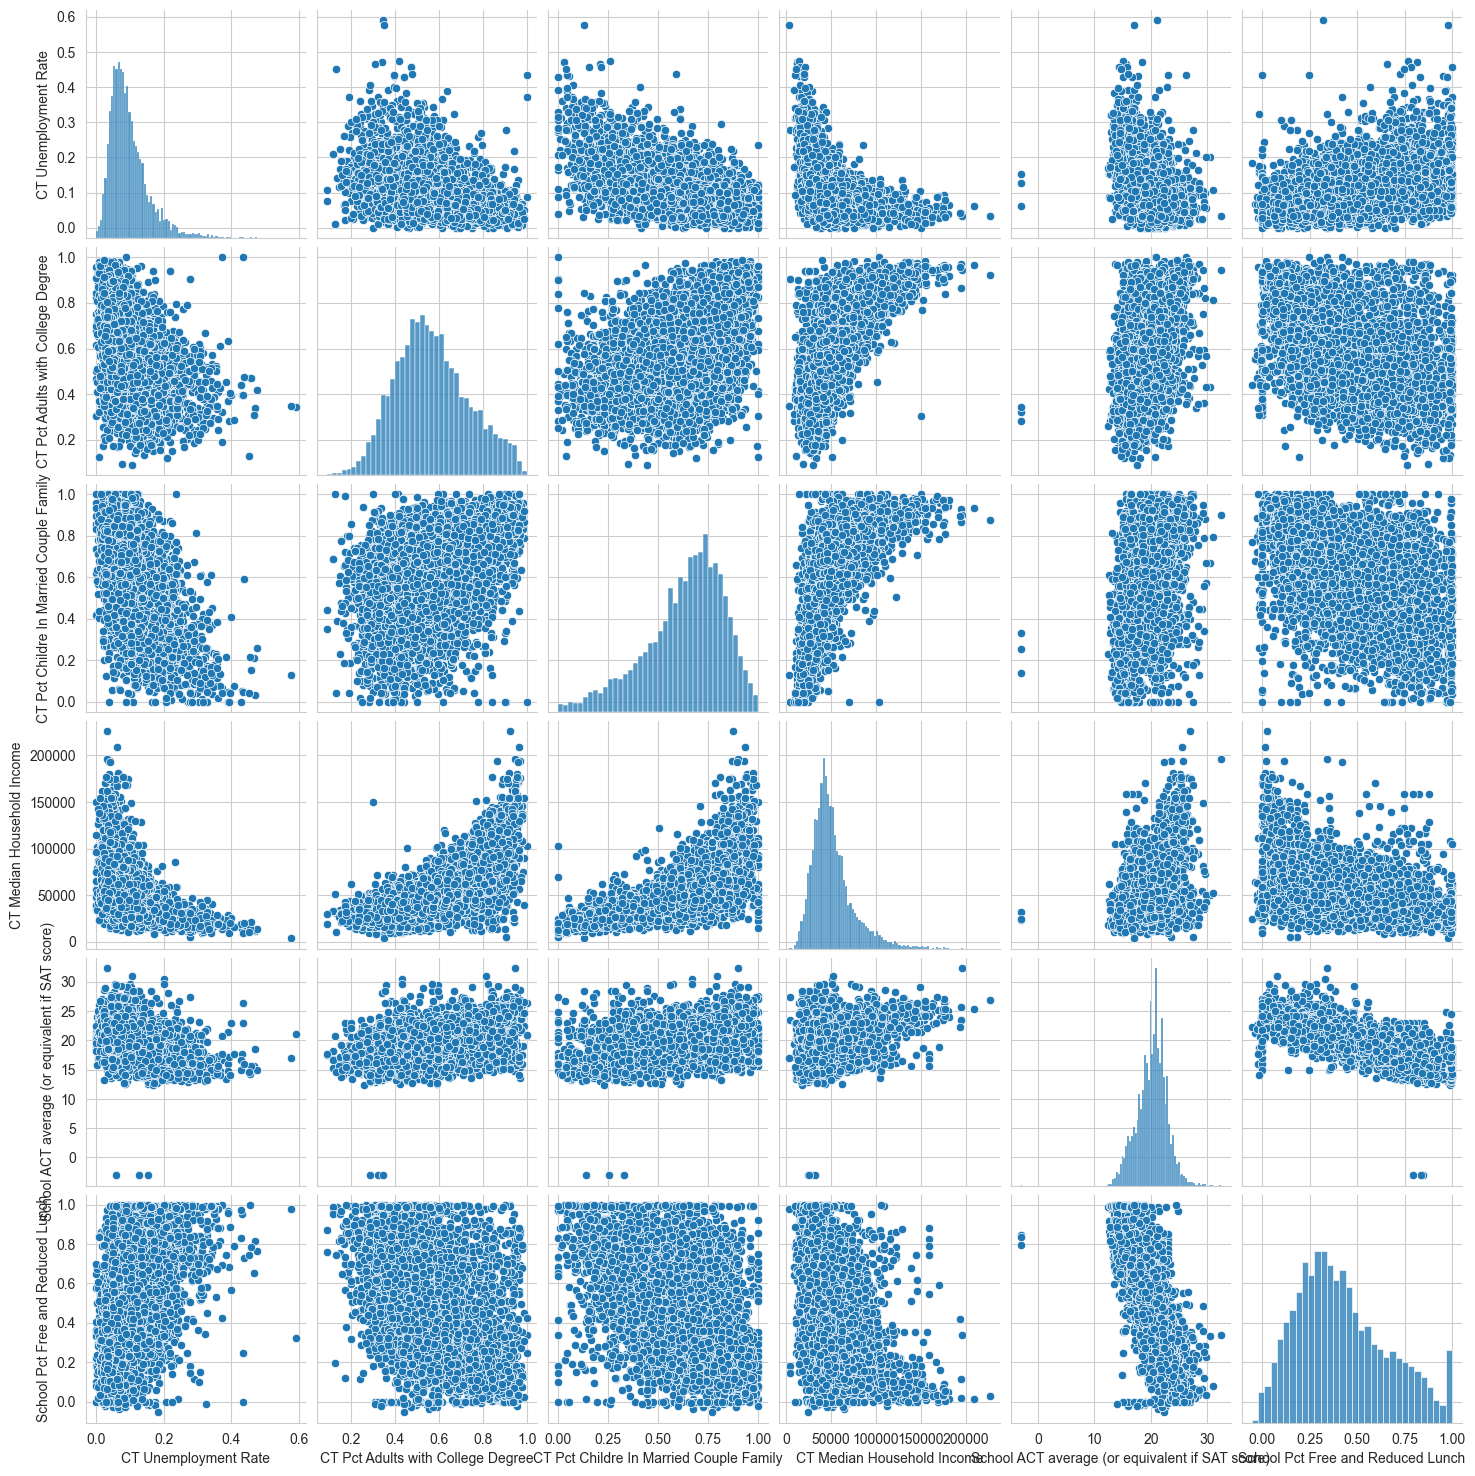

In [17]:
sns.pairplot(
    edgap.drop(columns="NCESSCH School ID"));

plt.show()

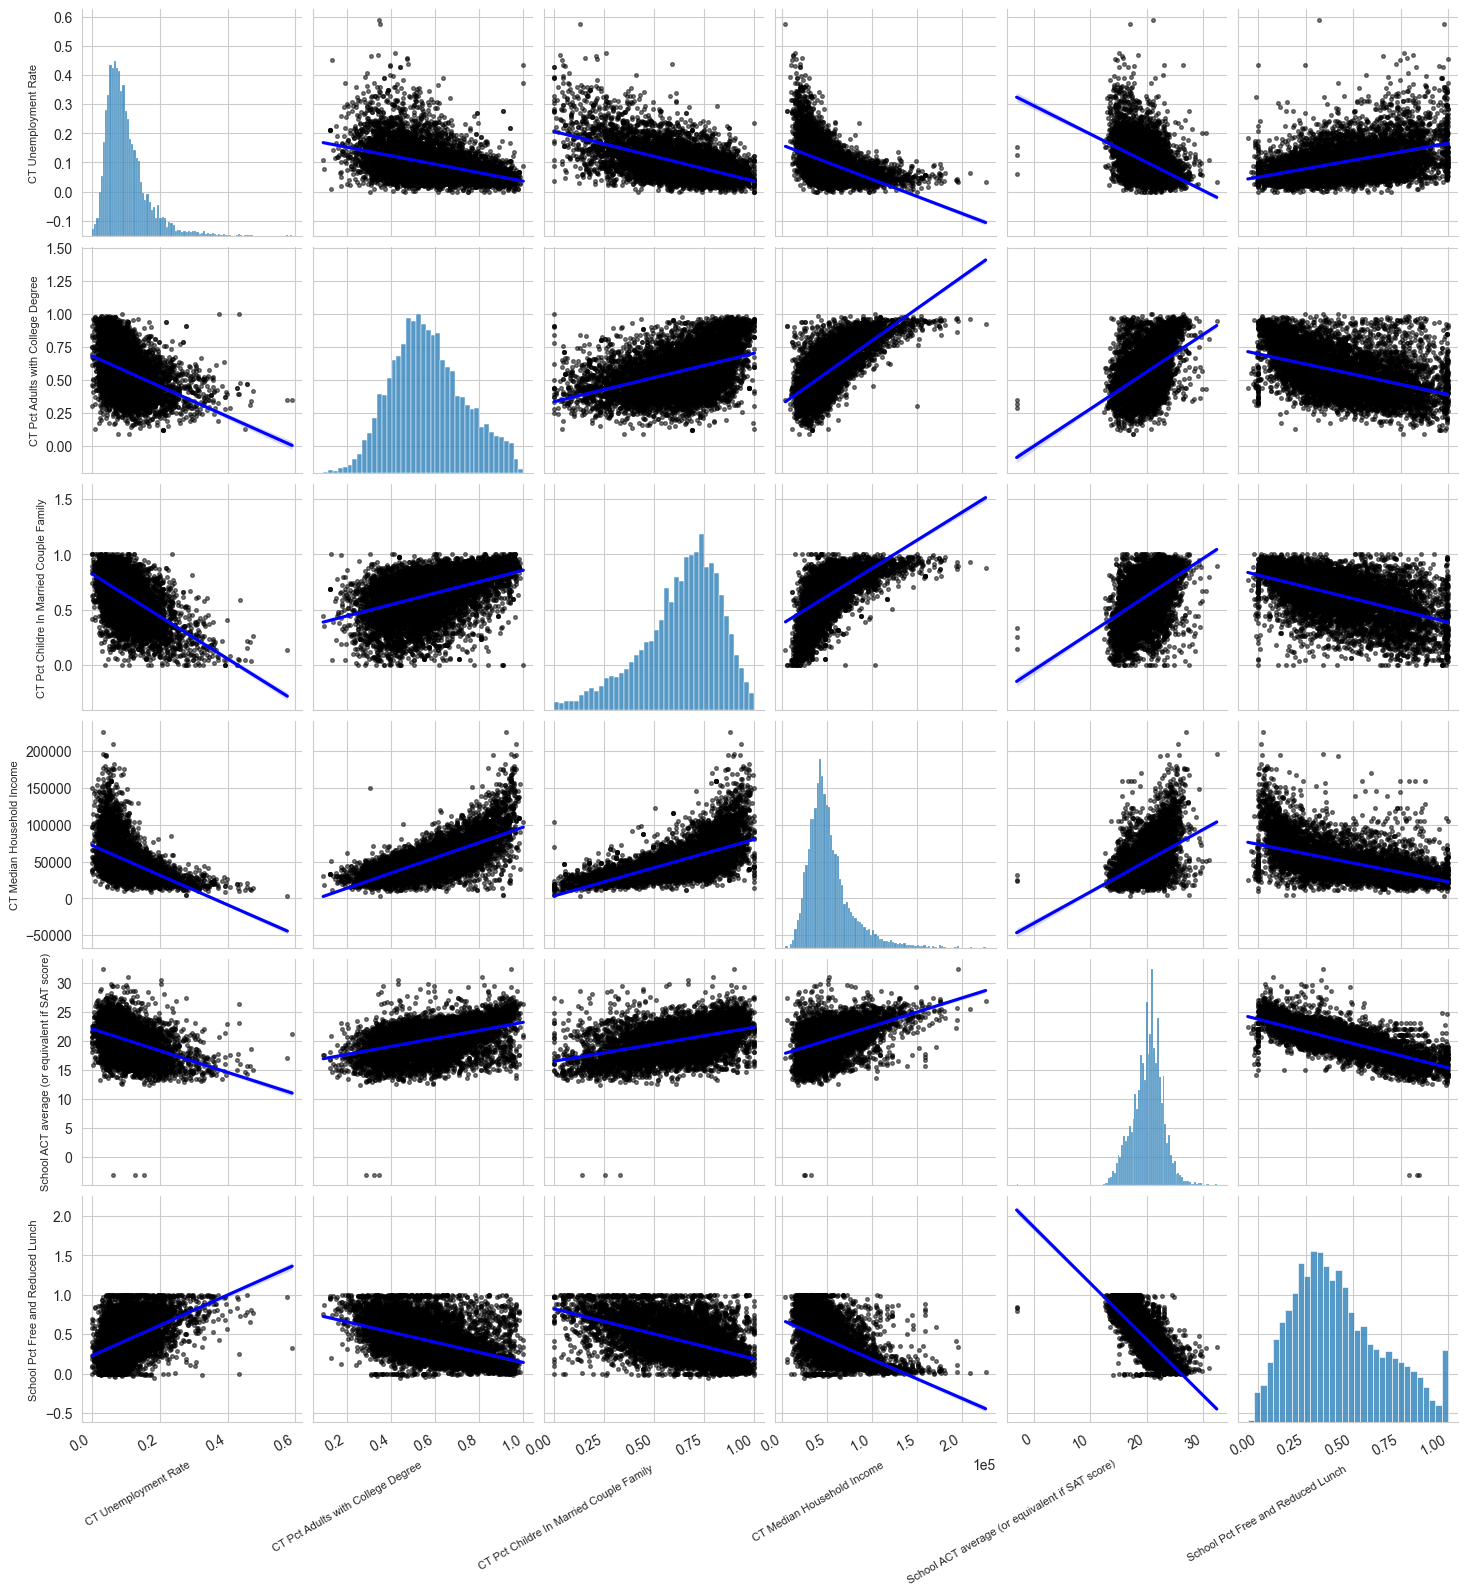

In [18]:
fig = sns.pairplot(
    edgap.drop(columns="NCESSCH School ID"),
    kind="reg",
    plot_kws={
        "line_kws": {"color": "blue"},
        "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    },
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')  # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')


plt.show()

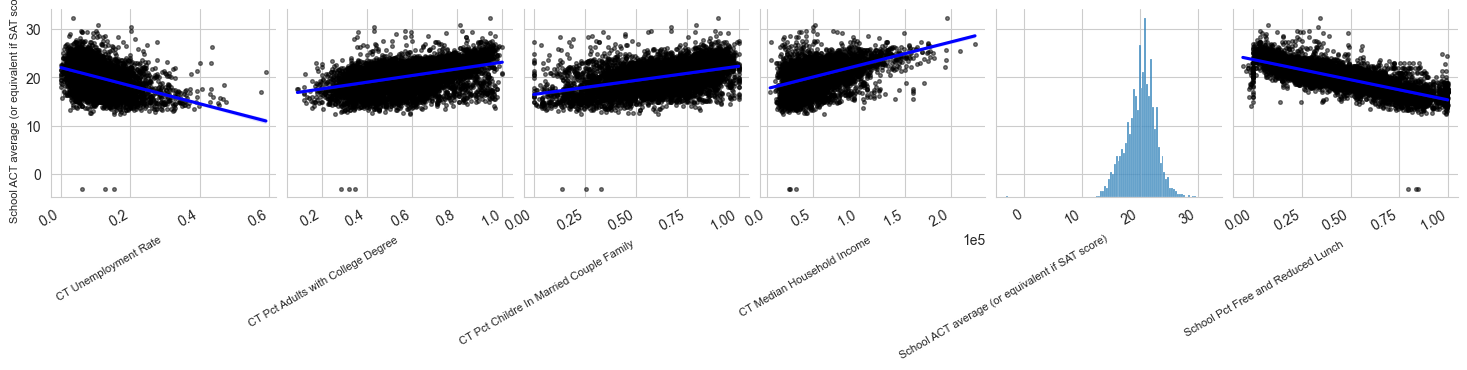

In [19]:
fig = sns.pairplot(
    edgap.drop(columns="NCESSCH School ID"),
    y_vars=['School ACT average (or equivalent if SAT score)'],
    kind="reg",
    plot_kws={
        "line_kws": {"color": "blue"},
        "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    },
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')  # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

#### There appears to be a relationship between the socioeconomic variables and the ACT score.

#### There are some out-of-range ACT and percent lunch values that will need to be dealt with.

#### We should have confidence that it is worthwhile to spend time preparing the data for analysis.

## Data Preparation

### Select relevant subsets of the data

#### We only need the year, school identity, location, and school type information (SCHOOL_YEAR, NCESSSCH, LSTATE, LZIP, SCH_TYPE_TXT, LEVEL, CHARTER_TEXT)

In [20]:
school_information = school_information[['SCHOOL_YEAR', 'NCESSCH', 'LSTATE', 'LZIP', 'SCH_TYPE_TEXT', 'LEVEL', 'CHARTER_TEXT']]

In [21]:
school_information.head()

SCHOOL_YEAR       NCESSCH LSTATE   LZIP       SCH_TYPE_TEXT LEVEL  \
0   2016-2017  1.000020e+10     AL  35220  Alternative School  High   
1   2016-2017  1.000020e+10     AL  36067  Alternative School  High   
2   2016-2017  1.000020e+10     AL  36784  Alternative School  High   
3   2016-2017  1.000020e+10     AL  36057  Alternative School  High   
4   2016-2017  1.000020e+10     AL  35206  Alternative School  High   

  CHARTER_TEXT  
0           No  
1           No  
2           No  
3           No  
4           No

### Rename Columns

#### We will rename the columns to follow best practices of style and being informative.

In [22]:
edgap = edgap.rename(
    columns={
        "NCESSCH School ID": "id",
        "CT Pct Adults with College Degree": "percent_college",
        "CT Unemployment Rate": "rate_unemployment",
        "CT Pct Childre In Married Couple Family": "percent_married",
        "CT Median Household Income": "median_income",
        "School ACT average (or equivalent if SAT score)": "average_act",
        "School Pct Free and Reduced Lunch": "percent_lunch",
    }
)

In [23]:
school_information = school_information.rename(
    columns={
        "SCHOOL_YEAR": "year",
        "NCESSCH": "id",
        "LSTATE": "state",
        "LZIP": "zip_code",
        "SCH_TYPE_TEXT": "school_type",
        "LEVEL": "school_level",
        "CHARTER_TEXT": "charter"
    }
)


#### 1. We selected a subset of columns of the school information data set.
#### 2. We renamed the columns for clarity and to follow formatting guidelines.
#### 3. We are ready to join the data frames.



## Join data frames

#### We want to join the DataFrames using the identity of the school as the key. The identity is given by the NCESSCH school identity. The value is an object in the EdGap data set and a float64 in the school information data set.

#### We will cast the id column in the school_information DataFrame as an object.


In [24]:
school_information['id'] = school_information['id'].astype('object')

In [25]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          102183 non-null  object
 1   id            102181 non-null  object
 2   state         102183 non-null  object
 3   zip_code      102183 non-null  object
 4   school_type   102181 non-null  object
 5   school_level  102179 non-null  object
 6   charter       102179 non-null  object
dtypes: object(7)
memory usage: 5.5+ MB


In [26]:
edgap.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch  
0        42820.0    20.433455       0.066901  
1        89320.0    19.498168       0.112412  
2        84140.0    19.554335       0.096816  
3        56500.0    17.737485       0.296960  
4        54015.0    18.245421       0.262641

In [27]:
school_information.head()

year             id state zip_code         school_type school_level  \
0  2016-2017  10000200277.0    AL    35220  Alternative School         High   
1  2016-2017  10000201667.0    AL    36067  Alternative School         High   
2  2016-2017  10000201670.0    AL    36784  Alternative School         High   
3  2016-2017  10000201705.0    AL    36057  Alternative School         High   
4  2016-2017  10000201706.0    AL    35206  Alternative School         High   

  charter  
0      No  
1      No  
2      No  
3      No  
4      No

In [28]:
df = edgap.merge(
    school_information,
    how='left',
    on='id'
)

In [29]:
df.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch       year state zip_code  \
0        42820.0    20.433455       0.066901  2016-2017    DE    19804   
1        89320.0    19.498168       0.112412  2016-2017    DE    19709   
2        84140.0    19.554335       0.096816  2016-2017    DE    19709   
3        56500.0    17.737485       0.296960  2016-2017    DE    19958   
4        54015.0    18.245421       0.262641  2016-2017    DE    19934   

      school_type school_level charter  
0  Regular School         High     Yes  
1  Regular School         High      No  
2  Regular School         High      No  
3  Regular School         High      No  
4  Regular School         High      No

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7986 non-null   object 
 1   rate_unemployment  7972 non-null   float64
 2   percent_college    7973 non-null   float64
 3   percent_married    7961 non-null   float64
 4   median_income      7966 non-null   float64
 5   average_act        7986 non-null   float64
 6   percent_lunch      7986 non-null   float64
 7   year               7898 non-null   object 
 8   state              7898 non-null   object 
 9   zip_code           7898 non-null   object 
 10  school_type        7898 non-null   object 
 11  school_level       7898 non-null   object 
 12  charter            7898 non-null   object 
dtypes: float64(6), object(7)
memory usage: 811.2+ KB


#### We joined the data sets using the school id as the key.

#### We first cast the id as an object to have the same data type for the key in each data set.

#### We used a left join to keep all EdGap data.

## Quality Control

#### There are natural bounds for the numerical variables in the data set. Check the minimum and maximum values in each column.

#### We can use the describe() method to compute descriptive statistics

In [31]:
df.describe()

rate_unemployment  percent_college  percent_married  median_income  \
count        7972.000000      7973.000000      7961.000000    7966.000000   
mean            0.098730         0.568930         0.633440   52026.905222   
std             0.058959         0.165704         0.196764   24228.057079   
min             0.000000         0.091493         0.000000    3589.000000   
25%             0.058655         0.450828         0.523810   36597.250000   
50%             0.085649         0.554979         0.667594   46833.500000   
75%             0.123376         0.676571         0.777135   61369.250000   
max             0.590278         1.000000         1.000000  226181.000000   

       average_act  percent_lunch  
count  7986.000000    7986.000000  
mean     20.181532       0.420651  
std       2.595201       0.239754  
min      -3.070818      -0.054545  
25%      18.600000       0.238501  
50%      20.400000       0.381570  
75%      21.910867       0.575447  
max      32.362637       0.998729

In [32]:
df.select_dtypes(include=['number']).agg(['min', 'max']).round(2)

rate_unemployment  percent_college  percent_married  median_income  \
min               0.00             0.09              0.0         3589.0   
max               0.59             1.00              1.0       226181.0   

     average_act  percent_lunch  
min        -3.07          -0.05  
max        32.36           1.00

In [33]:
df.loc[df['percent_lunch'] < 0, 'percent_lunch'] = np.nan

In [34]:
df.loc[df['average_act'] < 1, 'average_act'] = np.nan

In [35]:
df['school_type'].value_counts()

school_type
Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: count, dtype: int64

In [36]:
df['school_level'].value_counts()

school_level
High            7230
Other            631
Not reported      35
Elementary         2
Name: count, dtype: int64

In [37]:
df['charter'].value_counts()

charter
No                7329
Yes                352
Not applicable     217
Name: count, dtype: int64

In [38]:
df = df.loc[df['school_level'] == 'High']

In [39]:
df.duplicated().sum()

np.int64(0)

#### It is possible that there are incorrectly recorded values in the data set, but we will not go that far in this example.

In [40]:
df.isna().sum().to_frame(name='Number of Missing Values')

Number of Missing Values
id                                        0
rate_unemployment                        12
percent_college                          11
percent_married                          20
median_income                            16
average_act                               3
percent_lunch                            20
year                                      0
state                                     0
zip_code                                  0
school_type                               0
school_level                              0
charter                                   0

#### What percentage of values of each variable are missing?

In [41]:
percent_missing = df.isna().mean().round(4) * 100

percent_missing.to_frame(name='Percent Missing Values')

Percent Missing Values
id                                   0.00
rate_unemployment                    0.17
percent_college                      0.15
percent_married                      0.28
median_income                        0.22
average_act                          0.04
percent_lunch                        0.28
year                                 0.00
state                                0.00
zip_code                             0.00
school_type                          0.00
school_level                         0.00
charter                              0.00

#### State Data

In [42]:
df['state'].value_counts()

state
TX    913
OH    654
IL    564
PA    543
MI    498
NC    407
FL    404
GA    367
WI    351
NJ    341
MO    337
IN    321
NY    295
TN    265
WA    263
MA    253
KY    198
LA    194
WY     38
DE     24
Name: count, dtype: int64

In [43]:
df['state'].nunique()

20

### Plotting the Results

In [44]:
import plotly.offline as po
import plotly.graph_objs as pg

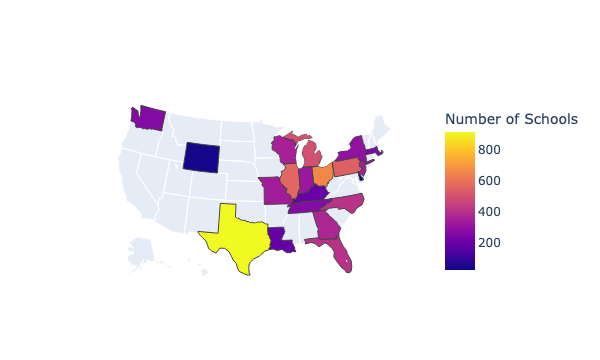

In [45]:
layout = dict(
    geo={"scope": "usa"}, coloraxis_colorbar=dict(title="Number of Schools")
)

data = dict(
    type="choropleth",
    locations=df["state"].value_counts().index,
    locationmode="USA-states",
    z=df["state"].value_counts().values,
    coloraxis="coloraxis",
)

x = pg.Figure(data=[data], layout=layout)

po.iplot(x)

#### We are missing a large amount of USA data due to omission. This is not evident by examining NaN values in the data set.

#### We could obtain this information from public records, but we will not do that here.

#### Not running these drops since there are major NaN issues with my data and I am missing the charter data due to issues with importing the csv.

In [46]:
df = df.dropna(subset=['average_act'])

In [47]:
df.isna().sum().to_frame(name='Number of Missing Values')

Number of Missing Values
id                                        0
rate_unemployment                        12
percent_college                          11
percent_married                          20
median_income                            16
average_act                               0
percent_lunch                            20
year                                      0
state                                     0
zip_code                                  0
school_type                               0
school_level                              0
charter                                   0

#### If we drop rows that have NaNs for any socioeconomic variables, then we will negatively affect our analysis using the variables where data were present. So, we will not drop the rows in this data set that are missing the socioeconomic variables. We will impute the missing values.

#### We set out-of-range values to NaN and will impute them.

#### We kept only high schools.

#### We removed schools where we do not have the ACT score.

#### Many schools are missing from the data by omission.

#### We will impute missing values of socioeconomic variables.



## Data Imputation

#### Define the predictor variables to be rate_unemployment, percent_college, percent_married, median_income, percent_lunch, state, and charter.

In [48]:
predictor_variables = [
    'rate_unemployment',
    'percent_college',
    'percent_married',
    'median_income',
    'percent_lunch',
    'state',
    'charter'
]

In [49]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [50]:
imputer = IterativeImputer()

### Fit the imputer using the numerical predictor variables (this can include dummies for categorical variables).

#### Define the columns you want to use in the imputation process

In [51]:
numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()

print(numerical_predictors)

['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']


#### Fit the imputer

In [52]:
imputer.fit(df.loc[:, numerical_predictors])

IterativeImputer()

#### Impute the missing data in the training data

In [53]:
df.loc[:, numerical_predictors] = imputer.transform(df.loc[:, numerical_predictors])

#### Check for missing values

In [54]:
df.isna().sum().to_frame(name='Number of Missing Values')

Number of Missing Values
id                                        0
rate_unemployment                         0
percent_college                           0
percent_married                           0
median_income                             0
average_act                               0
percent_lunch                             0
year                                      0
state                                     0
zip_code                                  0
school_type                               0
school_level                              0
charter                                   0

#### Export the clean dataset

In [55]:
df.to_csv(
    'education_clean.csv',
    encoding='utf-8-sig',
    index=False)

### Summary

#### We used an interative imputer to estimate missing values of numerical predictor variables

#### We saved the clean data frame as a csv file.

## Exploratory Data Analysis

#### Load Clean Data

In [56]:
df = pd.read_csv('https://raw.githubusercontent.com/CameronMangione/education/refs/heads/main/code/education_clean.csv')

In [57]:
df.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch       year state  zip_code  \
0        42820.0    20.433455       0.066901  2016-2017    DE     19804   
1        89320.0    19.498168       0.112412  2016-2017    DE     19709   
2        84140.0    19.554335       0.096816  2016-2017    DE     19709   
3        56500.0    17.737485       0.296960  2016-2017    DE     19958   
4        54015.0    18.245421       0.262641  2016-2017    DE     19934   

      school_type school_level charter  
0  Regular School         High     Yes  
1  Regular School         High      No  
2  Regular School         High      No  
3  Regular School         High      No  
4  Regular School         High      No

### Examine distributions and relationships

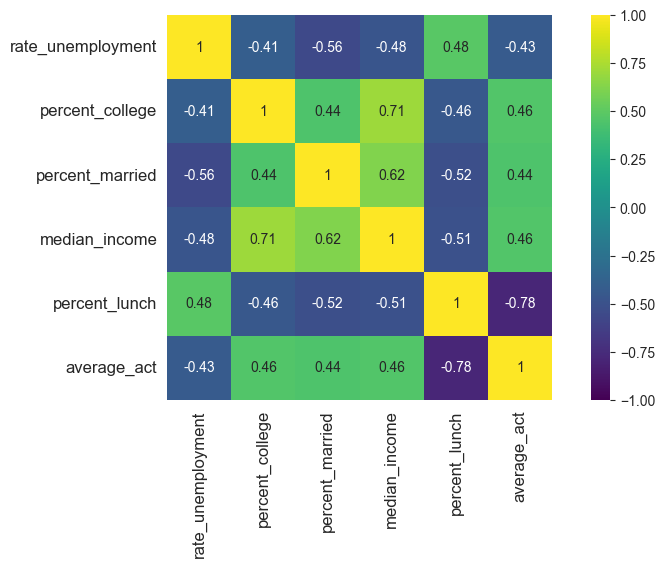

In [58]:
predictor_variables = ['rate_unemployment', 'percent_college', 'percent_married', 'median_income','percent_lunch']

numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = df[numerical_predictors+ ["average_act"]].corr()

plt.figure(figsize=(10,5))

sns.heatmap(corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis")

plt.tick_params(labelsize=12)

plt.show()

### Make pair plots to explore relationships between the variables

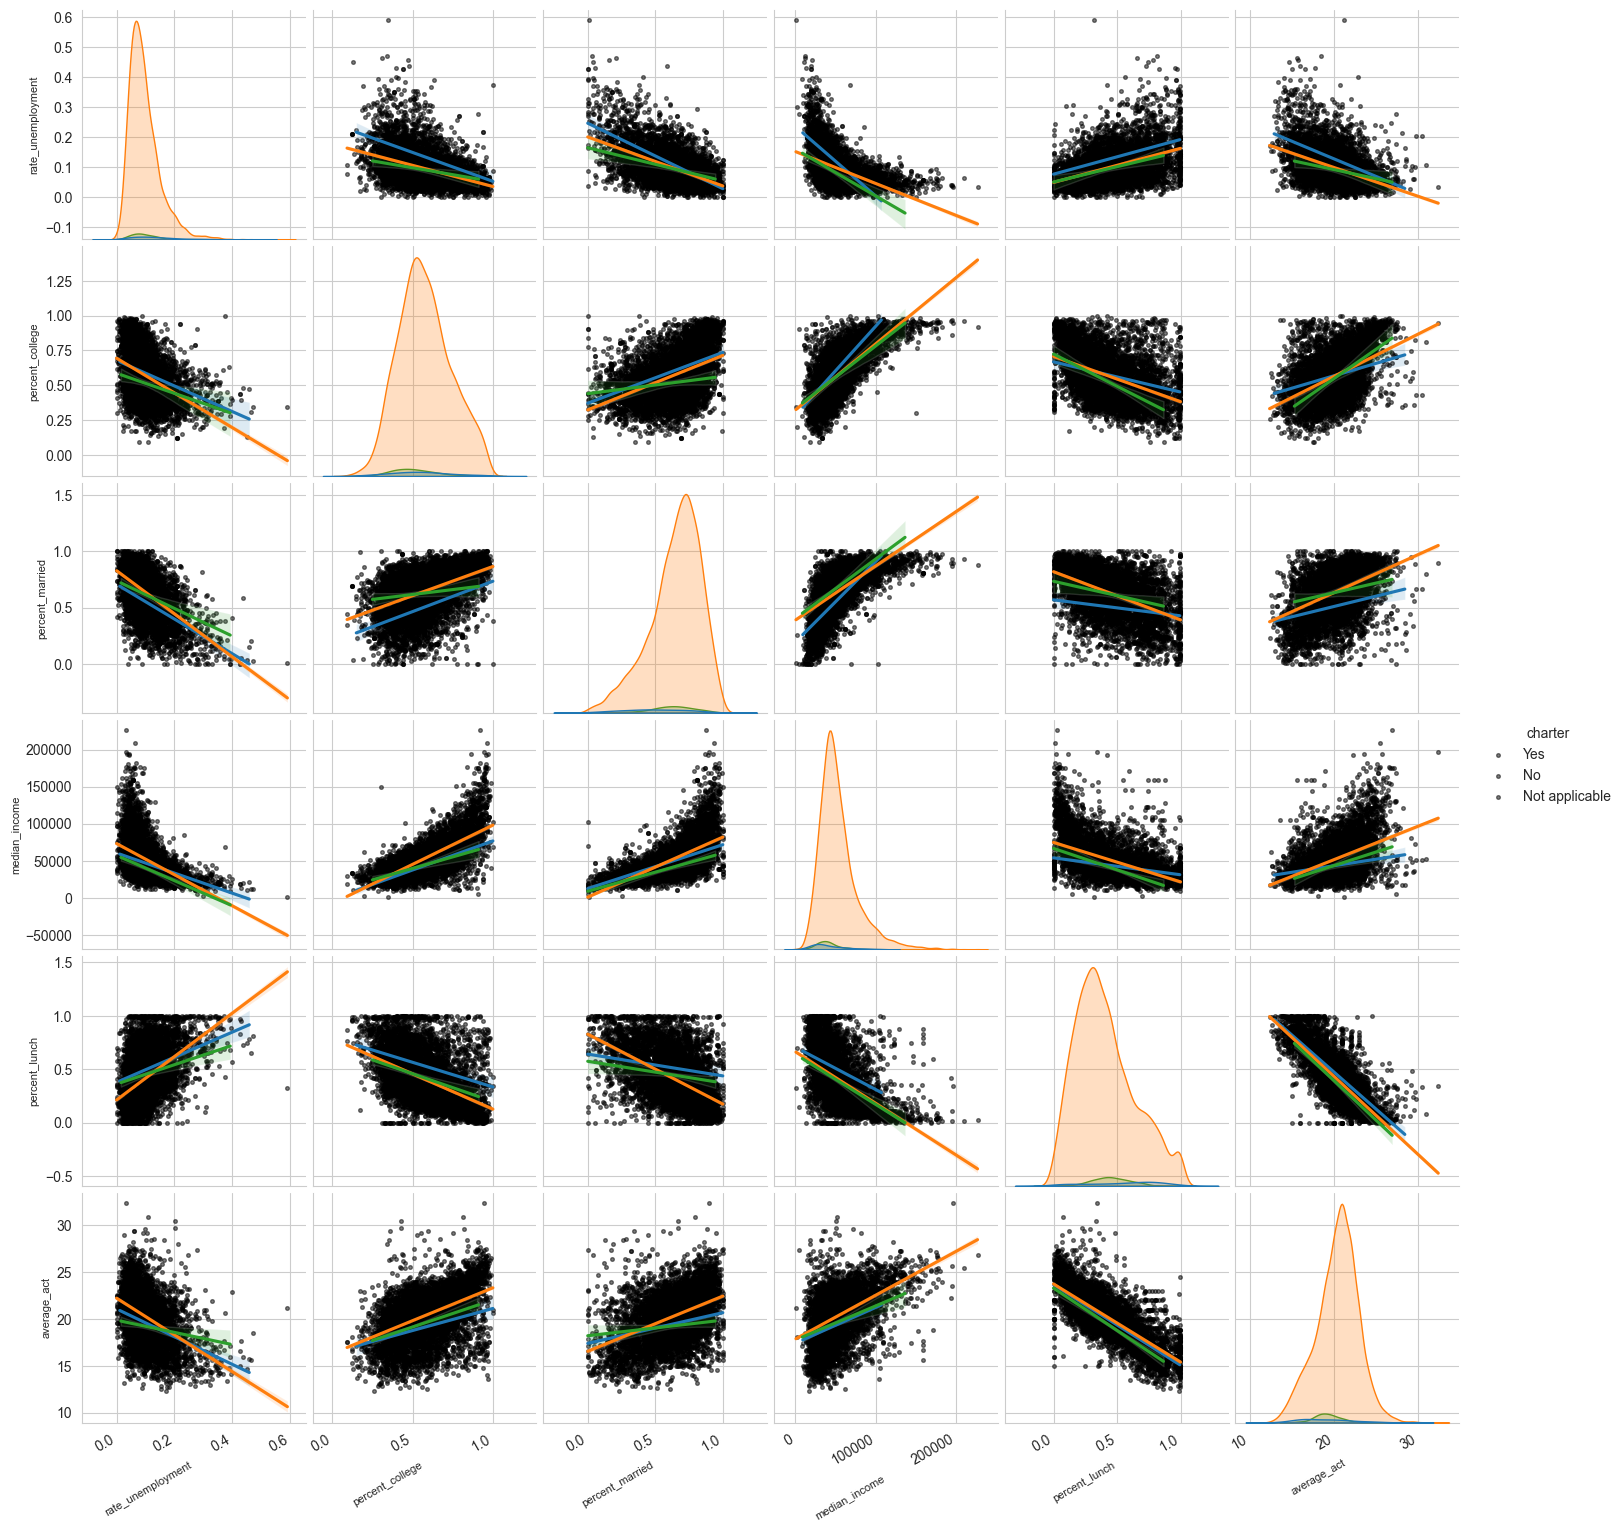

In [60]:
fig = sns.pairplot(
    data=df,
    vars=numerical_predictors + ['average_act'],
    hue='charter',
    kind="reg",
    plot_kws={"scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    },
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')  # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

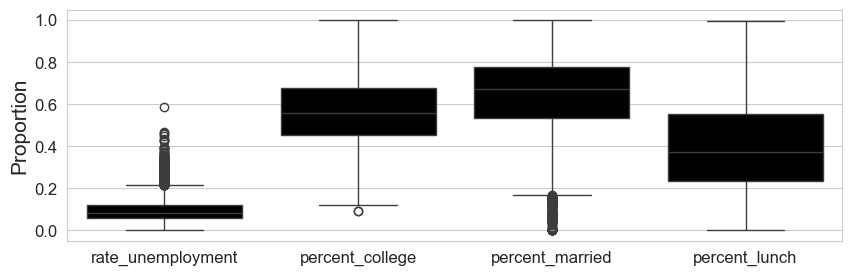

In [62]:
plt.figure(figsize=(10,3))

fractions = list(numerical_predictors)
fractions.remove('median_income')

sns.boxplot(data=df[fractions], color='k')

plt.ylabel('Proportion', fontsize=15)

plt.tick_params(labelsize=12)

plt.show()

# Summary

#### The numerical predictos are related to average_act. Relationship is roughly linear.

#### Numberical predictors are correlated with each other, suggesting not all predictors will be necessary.

#### Some variables have skewed distributions, suggesting transformations of input variables might be useful.

#### There are outliers in rate_unemployment, percent_college, percent_married and median_income, which reflect skewed distributions. a Log transformation to these predictors might be useful when exploring different models.

#### Relationships are similar across charter and non-charter schools,  but there could be significant difference regardless.

# Modeling

### Single input models

Fit and assess models predicting the average ACT score from each of the input variables, such as polynoial linear regressions.

### Median income

Plot the regression line and the scatter plot

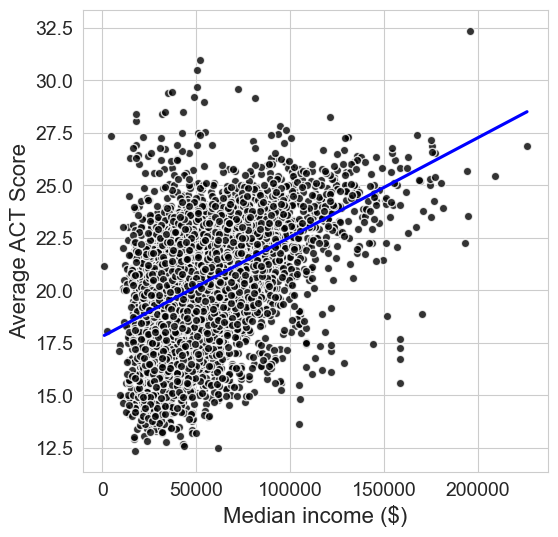

In [66]:
plt.figure(figsize=(6,6))

sns.regplot(data=df,
            x = 'median_income',
            y = 'average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

#Add axis labels
plt.xlabel('Median income ($)', fontsize=16)
plt.ylabel('Average ACT Score', fontsize=16)

#Increase the fontsize of the tick labels
plt.tick_params(labelsize=14)

plt.show()

Fit the simple linear regression model

In [68]:
model_median_income = smf.ols(formula='average_act ~ median_income', data=df).fit()

In [70]:
print(model_median_income.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     1934.
Date:                Wed, 15 Oct 2025   Prob (F-statistic):               0.00
Time:                        19:45:10   Log-Likelihood:                -16043.
No. Observations:                7227   AIC:                         3.209e+04
Df Residuals:                    7225   BIC:                         3.210e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        17.8026      0.063    284.794

Numerical assessment of fit accuracy

Compute the R-Suqared

In [74]:
model_median_income.rsquared

np.float64(0.21118648979301036)

Compute the RMSE

In [75]:
y_hat = model_median_income.predict()

In [76]:
np.sqrt(mean_squared_error(df['average_act'], y_hat)).round(3)

np.float64(2.228)

Compute the mean absolute error

In [79]:
mean_absolute_error(df['average_act'], y_hat)

1.7129386980688535

Use a residual plot for graphical assessment of model fit

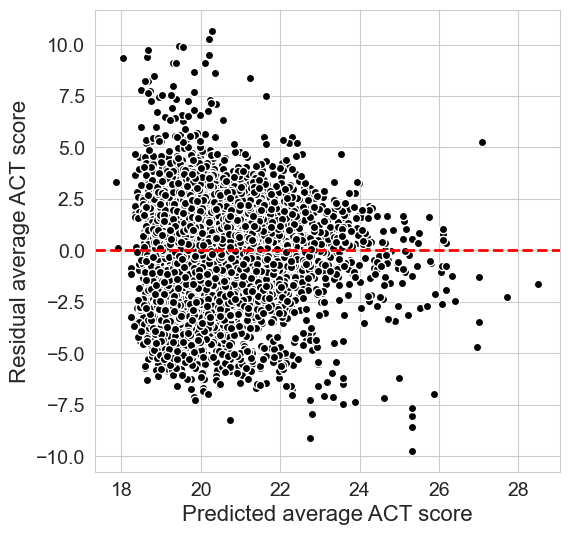

In [81]:
plt.figure(figsize=(6, 6))

plt.plot(y_hat, model_median_income.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

#### Try a quadratic model. Plot the regression curves and the scatter plot

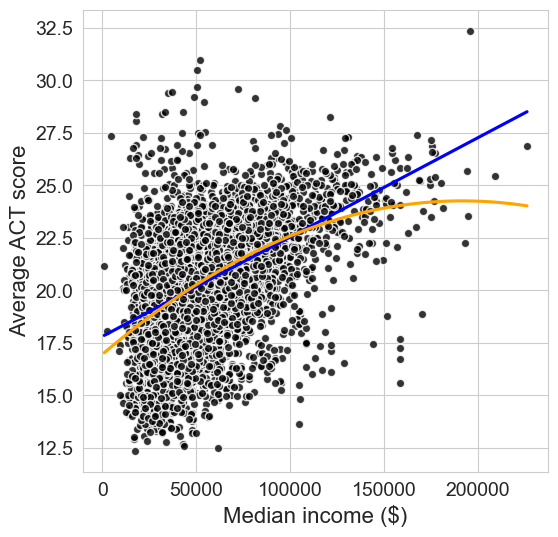

In [86]:
plt.figure(figsize=(6,6))

sns.regplot(data=df,
            x= 'median_income',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

sns.regplot(data=df,
            x= 'median_income',
            y='average_act',
            order =2,
            color='orange',
            ci=False,
            scatter=False)

# Add axis labels
plt.xlabel('Median income ($)', fontsize=16)
plt.ylabel('Average ACT score', fontsize=16)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14)

plt.show()

In [88]:
model_median_income2 = smf.ols(formula='average_act ~ median_income + I(median_income**2)',data=df).fit()

In [90]:
print(model_median_income2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     1013.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:56:12   Log-Likelihood:                -16007.
No. Observations:                7227   AIC:                         3.202e+04
Df Residuals:                    7224   BIC:                         3.204e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                16.94

In [91]:
model_median_income2.pvalues

Intercept                0.000000e+00
median_income            2.631899e-99
I(median_income ** 2)    1.395848e-17
dtype: float64

In [92]:
anova_lm(model_median_income, model_median_income2)

df_resid           ssr  df_diff     ss_diff          F        Pr(>F)
0    7225.0  35865.012794      0.0         NaN        NaN           NaN
1    7224.0  35505.105960      1.0  359.906834  73.227974  1.395848e-17

In [94]:
mean_absolute_error(df['average_act'], model_median_income2.predict())

1.6972389257619824

In [95]:
mean_absolute_error(df['average_act'], model_median_income.predict())

1.7129386980688535

### Multiple Linear Regression Model

Fit the multiple linear regression model using all socioeconomic variables as predictors

In [96]:
model = smf.ols(
    formula='average_act ~ rate_unemployment + percent_college + percent_married + median_income +percent_lunch',
    data=df).fit()

In [97]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     2438.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        01:15:56   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.667e+04
Df Residuals:                    7221   BIC:                         2.671e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.6972      0.13

In [99]:
y_hat = model.predict()

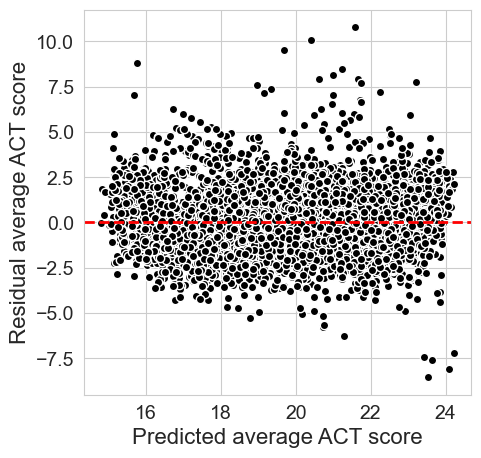

In [100]:
plt.figure(figsize=(5, 5))

plt.plot(y_hat, model.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

In [101]:
mean_absolute_error(df['average_act'], model.predict())

1.1453304788886207

### Summary

Multiple linear regression with all socioeconomic predictors can predict ACT scores with an average erro of roughly 1 point using these predictors.

Residual plot suggests that there will be limited imporvement from adding transformations of these predictors.

Not all predictors have significant coefficients.

Adding predictors to the model may improve performances.

### Reduced model

In [102]:
model_reduced = smf.ols(formula='average_act ~ rate_unemployment + percent_lunch',data=df).fit()

In [103]:
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     5857.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        01:43:43   Log-Likelihood:                -13418.
No. Observations:                7227   AIC:                         2.684e+04
Df Residuals:                    7224   BIC:                         2.686e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            23.9116      0.04

In [104]:
y_hat = model_reduced.predict()

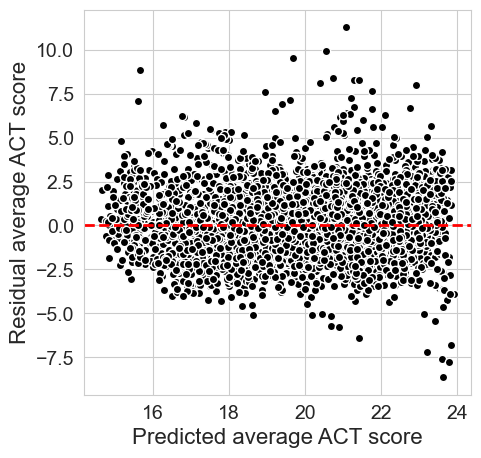

In [105]:
plt.figure(figsize=(5, 5))

plt.plot(y_hat, model_reduced.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

In [106]:
mean_absolute_error(df['average_act'], model_reduced.predict())

1.1615587766434994

In [110]:
mae_full = mean_absolute_error(df['average_act'], model.predict())
mae_reduced = mean_absolute_error(df['average_act'], model_reduced.predict())

r2_full = model.rsquared
r2_reduced = model_reduced.rsquared

pd.DataFrame({'Mean Absolute Error': [mae_full, mae_reduced],
              'R-squared': [r2_full, r2_reduced]},
             index=['full model', 'reduced model']).round(4)
             

Mean Absolute Error  R-squared
full model                  1.1453     0.6280
reduced model               1.1616     0.6185

In [111]:
anova_lm(model_reduced, model)

df_resid           ssr  df_diff     ss_diff          F        Pr(>F)
0    7224.0  17343.725366      0.0         NaN        NaN           NaN
1    7221.0  16915.612457      3.0  428.112909  60.918147  6.903892e-39

### Summary

The model predicting the average ACT score from rate_unemployment, percent_college and percent_lunch is not significantly different than the model with a ll five socioeconomic variables as predictors.

Adding predictors to the model may improve the performance.

We have not yet determined the relative importance of each predictor in the model.

### Scaling

Scale the predictor variables in the reduced model to have mean 0 and standard deviation 1 and add them to the data frame.

In [112]:
predictor_variables = ['rate_unemployment', 'percent_college', 'percent_lunch']

In [117]:
scaled_columns = [var + '_normalized' for var in predictor_variables]
print(scaled_columns)

['rate_unemployment_normalized', 'percent_college_normalized', 'percent_lunch_normalized']


In [119]:
scaler = StandardScaler().fit(df[predictor_variables])

In [120]:
df[scaled_columns] = scaler.transform(df[predictor_variables])

In [121]:
df[scaled_columns].agg(['mean','std']).round(3)

rate_unemployment_normalized  percent_college_normalized  \
mean                          -0.0                        -0.0   
std                            1.0                         1.0   

      percent_lunch_normalized  
mean                       0.0  
std                        1.0

Fit the multiple linear regression model with the normalized predictors

In [124]:
model_normalized = smf.ols(formula='average_act ~ rate_unemployment_normalized + percent_college_normalized + percent_lunch_normalized',data=df).fit()

In [125]:
print(model_normalized.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     4063.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        02:20:53   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.666e+04
Df Residuals:                    7223   BIC:                         2.669e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [129]:
mae_normalized = mean_absolute_error(df['average_act'], model_normalized.predict())
mae_reduced = mean_absolute_error(df['average_act'], model_reduced.predict())

r2_normalized = model_normalized.rsquared
r2_reduced = model_reduced.rsquared

pd.DataFrame({'Mean Absolute Error': [mae_normalized, mae_reduced],
              'R-squared': [r2_normalized, r2_reduced]},
             index=['normalized model', 'reduced model']).round(4)

Mean Absolute Error  R-squared
normalized model               1.1455     0.6279
reduced model                  1.1616     0.6185

### Summary

The percent of students at a school receiving free or reduced price lunch was the strongest predictor in this analysis in changing ACT scores.

No overall change in linear regression model, but does change the coefficients.

### Evaluation (only included for my reference)

Kind of? I guess we found information about one of the factors impacting ACT scores, but it seems like a lot ofthe variables don't have a strong relationship to ACT scores.

Yes, we had a limited number of states that we could draw data from, thus limiting our results. Significantly more schools from Texas. Median income is census data. Schools can draw people from larger areas, and some poeple may have a lot of money, but no kids. Percent lunch is from school, median income is from the area

I think we could explain where there was nto a significant relationship, and the scaler analysis describes how much a variable changes the ACT score, which I tihink means we can descirbe the results with quantitative analysis.

School Lunch has a relationship that can negatively impact ACT scores. It's a better predictor than median income because there is probably a stronger correlation of overall socioeconomic hardship with free or reduced lunches than median income, which can very widely and can skew more than free or reduced lunches.